# HW11_test

# P1
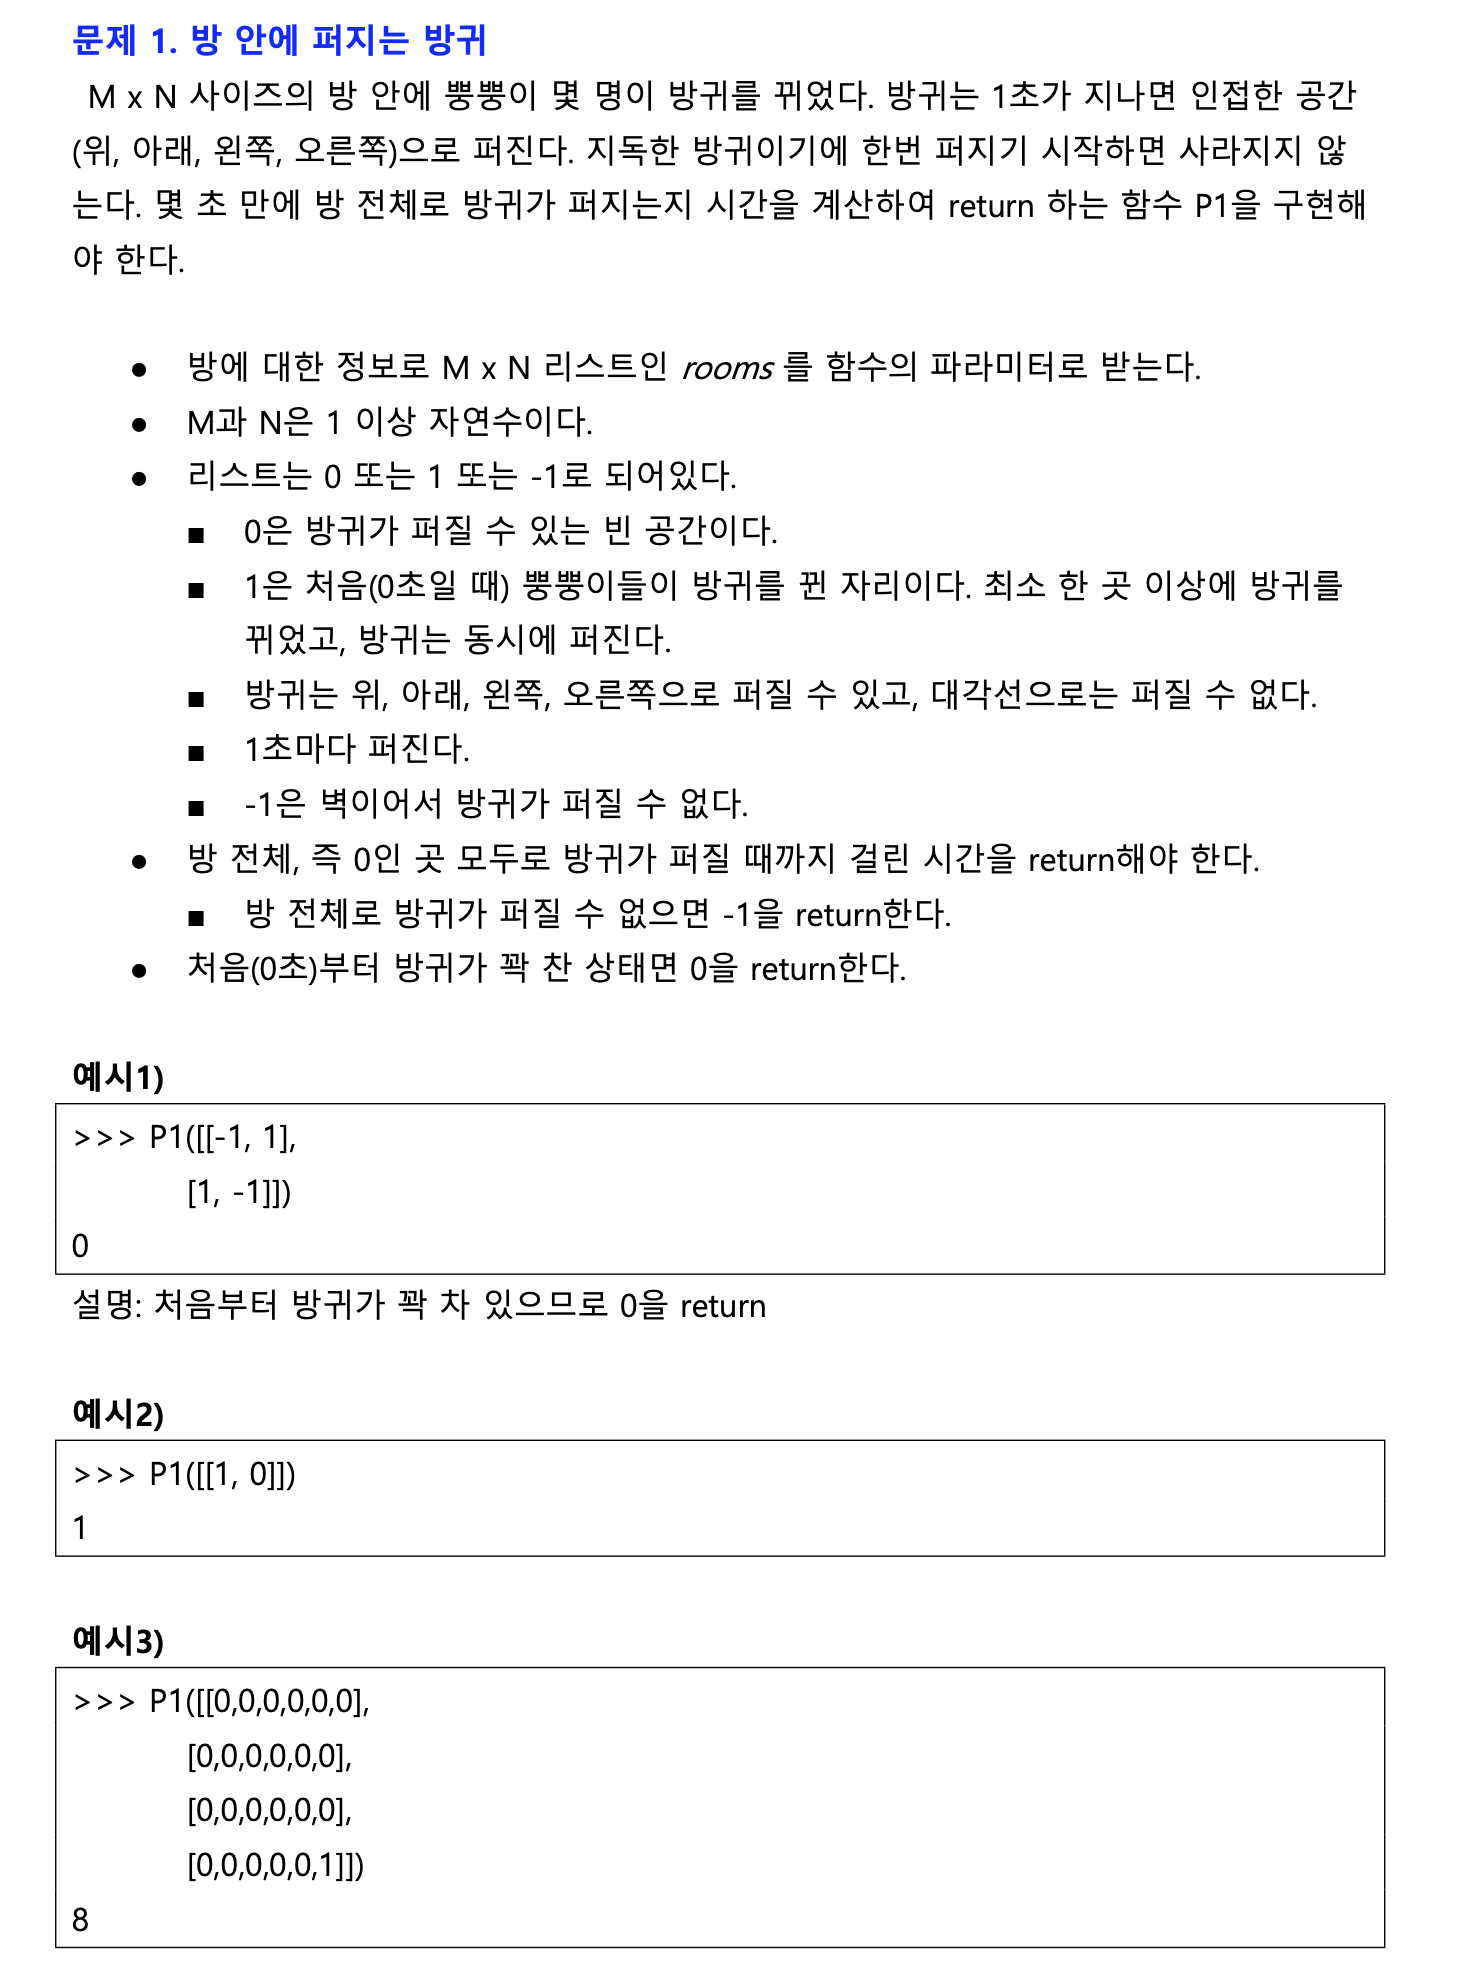
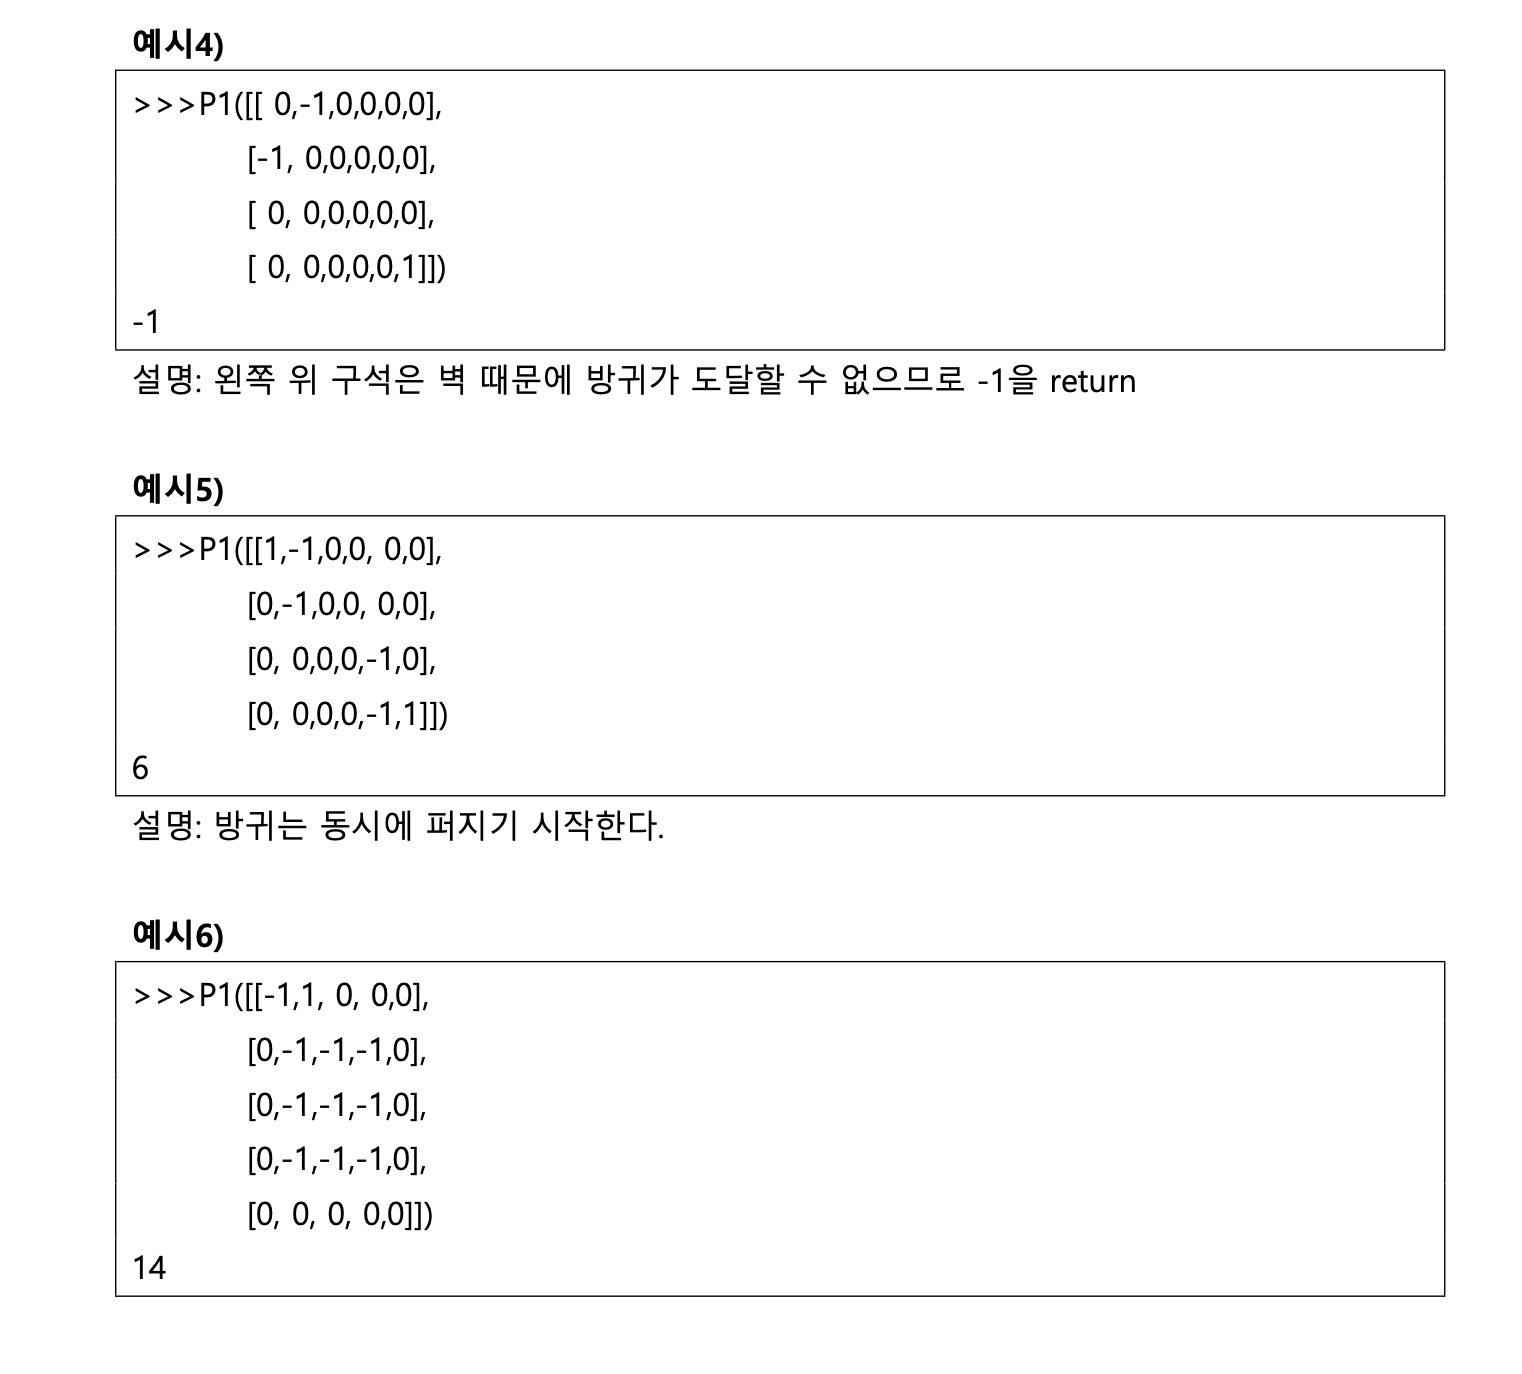

In [28]:
from typing import List
def P1(rooms: List[list]) -> int:
    ##### Write your Code Here #####
    # 0은 방귀가 퍼질수 있음. 1:방귀뀐 자리(한 곳 이상임). -1: 벽임
    # 퍼질 수 없으면 -1
    # 처음부터 꽉찼으면 0
    from collections import deque 
    
    m = len(rooms)
    n = len(rooms[0])
    q = deque([])
    
    for i in range(m):
        for j in range(n):
            if rooms[i][j] == 1:
                q.append((i,j,1))
                
    while len(q) != 0:
        nd = q.popleft()
#         print(node[2])
        
        if 0 <= rooms[nd[0]][nd[1]] <= 1:
            rooms[nd[0]][nd[1]] = nd[2]
            spread = [(0,1), (0,-1), (1,0), (-1,0)]
            for i in spread:
                s_m = nd[0] + i[0]
                s_n = nd[1] + i[1]
                
                if 0 <= s_m < m and 0 <= s_n < n and rooms[s_m][s_n] == 0:
                    q.append((s_m, s_n, nd[2] +1))
    
    ans = 0
    for i in range(m):
        for j in range(n):
            if rooms[i][j] == 0:
                return -1
            elif rooms[i][j] > 0:
                ans = max(ans, rooms[i][j] -1)
    
    return ans
    
 
    ##### End of your code #####

In [29]:
P1([[0, 0, 0], [0, 1, 0], [0,0,0]])

2

In [30]:
P1([[-1, 1], [1, -1]])

0

In [31]:
 P1([[1, 0]])

1

In [32]:
 P1([[0,0,0,0,0,0], [0,0,0,0,0,0], [0,0,0,0,0,0],
[0,0,0,0,0,1]])

8

In [33]:
P1([[ 0,-1,0,0,0,0], [-1, 0,0,0,0,0], [ 0, 0,0,0,0,0],
[ 0, 0,0,0,0,1]])

-1

In [34]:
P1([[1,-1,0,0, 0,0], [0,-1,0,0, 0,0], [0, 0,0,0,-1,0],
[0, 0,0,0,-1,1]])

6

In [35]:
P1([[-1,1, 0, 0,0], [0,-1,-1,-1,0], [0,-1,-1,-1,0], [0,-1,-1,-1,0],
[0, 0, 0, 0,0]])

14

# P2
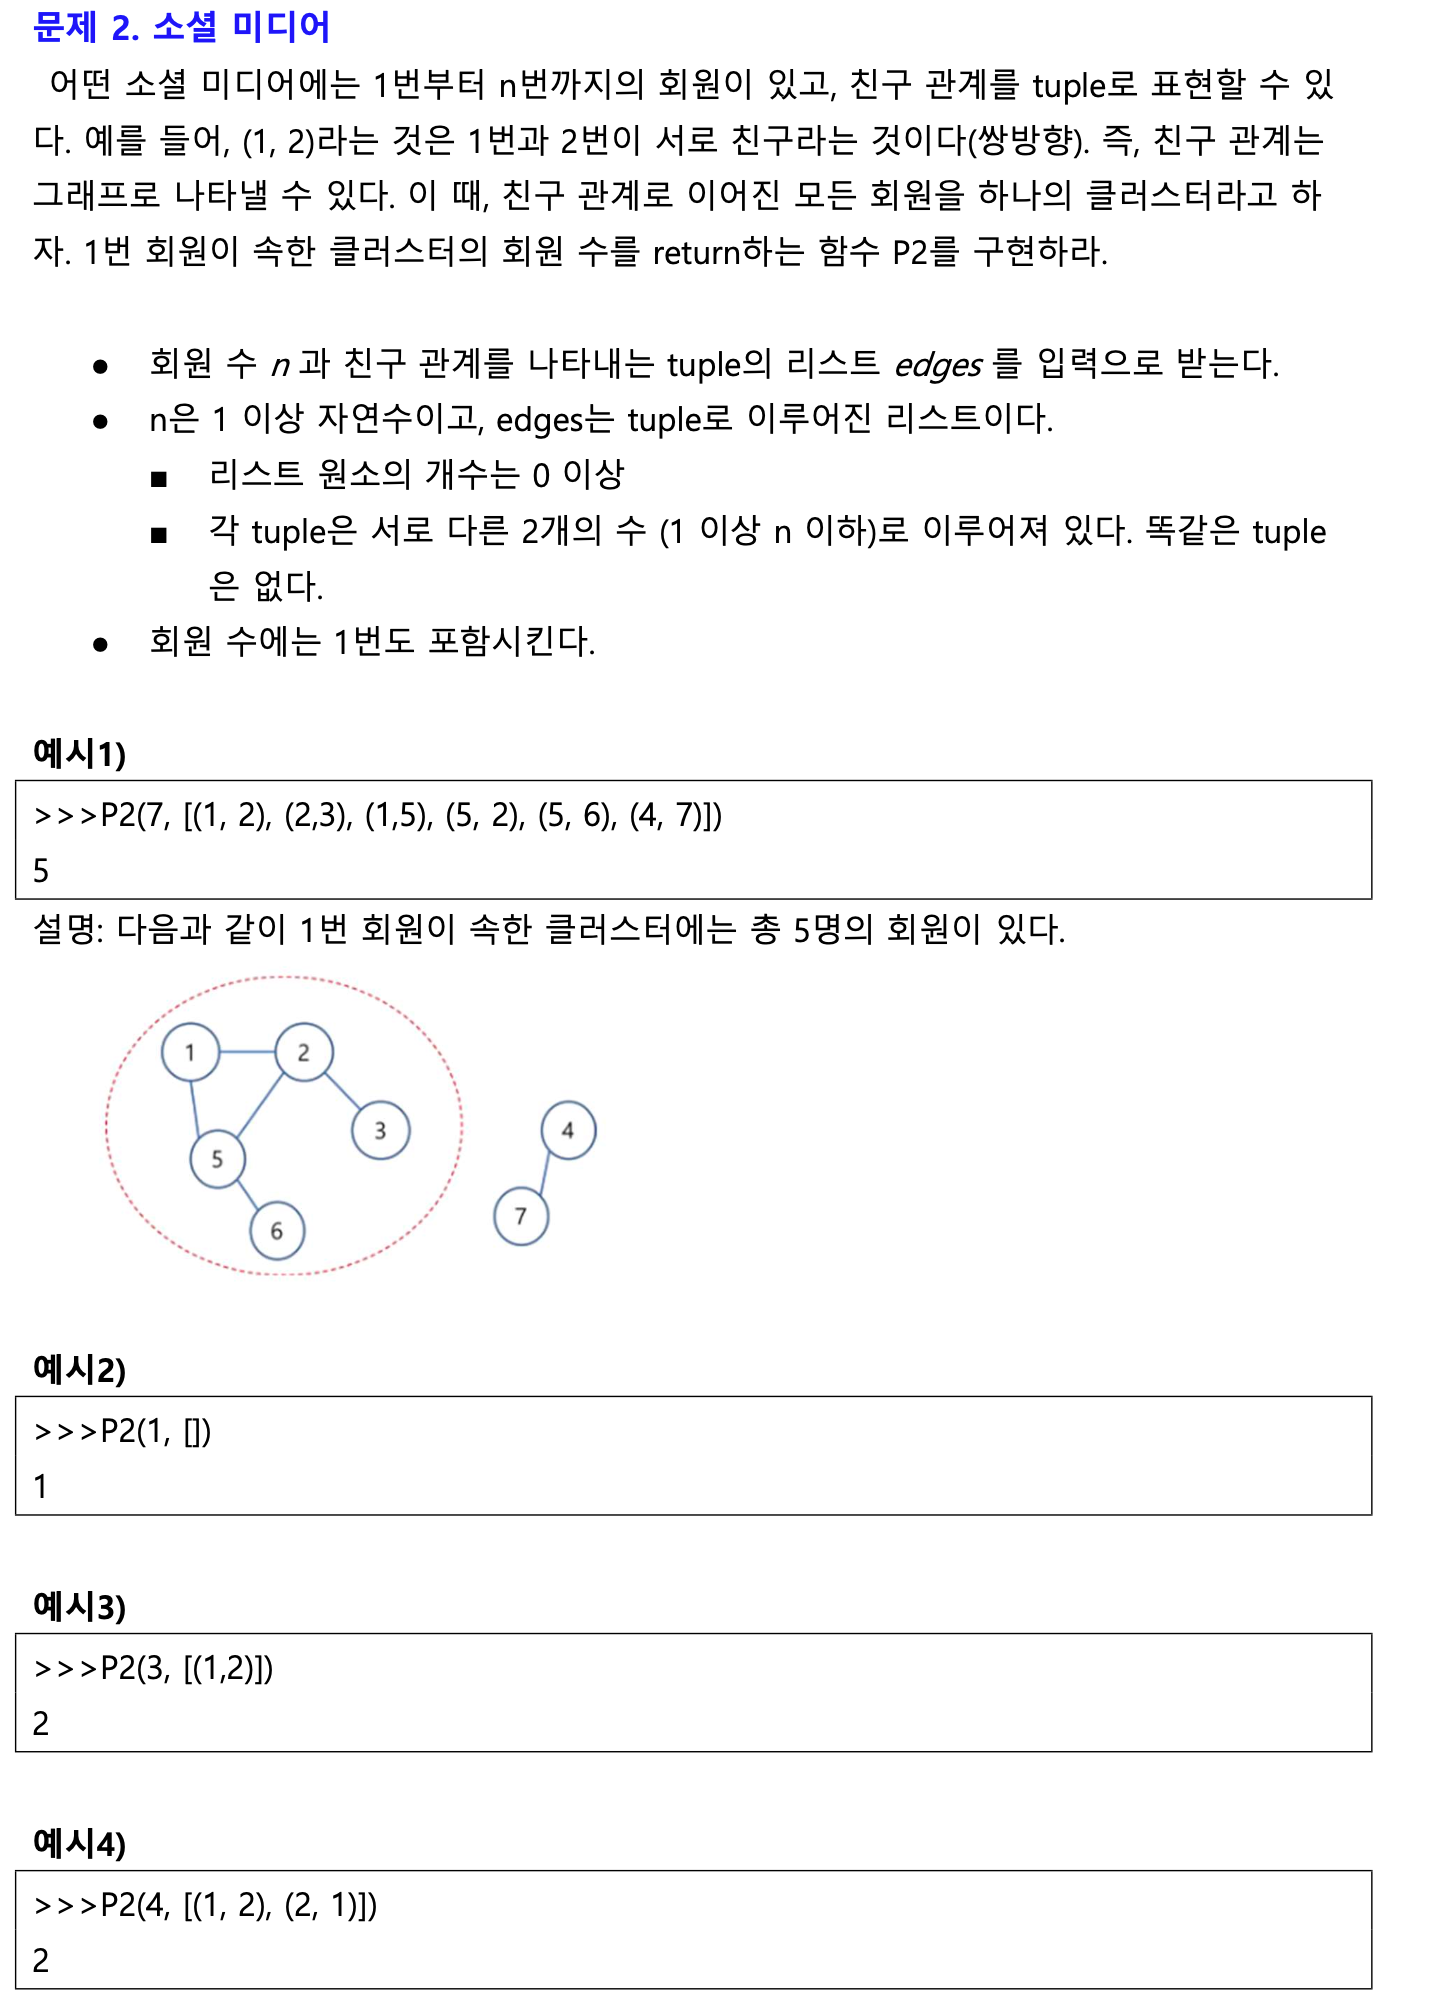

https://www.geeksforgeeks.org/graph-and-its-representations/

In [2]:
from typing import List
def P2(n: int, edges: List[tuple]) -> int:
    ##### Write your Code Here #####
    
    class AdjNode:
        def __init__(self, data):
            self.vertex = data
            self.next = None

    class Graph:
        def __init__(self, vertices:int): # 그래프 요소 수
            self.V = vertices
            self.graph = [None] * self.V

        def add_edge(self, src, dest):
            node = AdjNode(dest)
            node.next = self.graph[src-1]
#             self.graph[src-1] = node
            self.graph[src-1] = node

            node = AdjNode(src)
            node.next = self.graph[dest-1]
#             self.graph[dest-1] = node
            self.graph[dest-1] = node

#         def print_graph(self):
#             for i in range(self.V):
#                 print("Adjacency list of vertex {}\n head".format(i+1), end="")
#                 temp = self.graph[i]
#                 while temp:
#                     print(" -> {}".format(temp.vertex), end="")
#                     temp = temp.next
#                 print(" \n")
                
        def cluster_withone(self):
            final = []
            for i in range(self.V):
                lst = []
                lst.append(i+1)
                temp = self.graph[i]
                while temp:
                    lst.append(temp.vertex)
                    temp = temp.next
                if 1 in lst:
                    final += lst
            return final      
    
    graph = Graph(n)
    for x,y in edges:
        graph.add_edge(x,y)
           
#     graph.print_graph()

    ans = list(set(graph.cluster_withone()))
#     print(ans)
    return len(ans)
     
    ##### End of your code #####

In [3]:
P2(7, [(1, 2), (2,3), (1,5), (5, 2), (5, 6), (4, 7)])

5

In [4]:
P2(1, [])

1

In [5]:
P2(3, [(1,2)])

2

In [6]:
P2(4, [(1, 2), (2, 1)])

2

In [7]:
P2(7, [(1, 2), (1, 5), (2, 3),(2, 4),(2, 5),(3, 4),(4, 5),(6,7)])

5

In [51]:
def P2_ans(n: int, edges: List[tuple]) -> int:
    graph = [[0 for _ in range(n)] for _ in range(n)]
        # adjacency matrix
    for e in edges:
        graph[e[0]-1][e[1]-1] = 1
        graph[e[1]-1][e[0]-1] = 1
    visit = [0] * n
    stack = []
    stack.append(0)
    ans = 0
    # dfs
    while len(stack) != 0:
        v = stack.pop()
        if visit[v] == 0:
            ans += 1
            visit[v] = 1
            # neighborhood 중 방문하지 않은 곳 stack 에 넣음
            for idx in range(n):
                if graph[v][idx] == 1 and visit[idx] == 0:
                    stack.append(idx)
    return ans

In [52]:
P2(68, [(31, 64), (48, 21), (36, 34), (49, 44), (19, 3), (25, 6), (66, 13), (67, 58), (32, 64), (13, 6), (53, 61), (28, 66), (66, 14), (20, 53), (54, 65), (28, 7), (39, 48), (14, 27), (60, 23), (48, 67), (66, 56), (67, 52), (33, 48), (64, 22), (29, 44), (20, 39), (66, 11), (20, 2), (32, 36), (62, 34), (19, 15), (55, 29), (36, 48), (11, 3), (19, 36), (50, 35), (44, 49), (21, 29), (36, 28), (17, 45), (47, 52), (34, 21), (49, 28), (32, 58), (38, 58), (38, 32), (29, 35), (21, 28), (39, 37), (4, 54), (66, 47), (42, 26), (25, 27), (9, 20), (29, 4), (54, 7), (6, 18), (56, 67), (35, 38), (31, 28), (39, 3), (31, 23), (13, 67), (26, 5), (33, 54), (20, 16), (46, 14), (48, 52), (43, 60), (42, 16), (49, 3), (6, 50), (58, 2), (62, 55), (67, 33), (54, 2), (38, 40), (55, 54), (54, 43), (58, 60), (10, 26), (6, 62), (19, 27), (1, 48), (46, 36), (57, 12), (19, 35), (21, 36), (27, 8), (15, 63), (17, 30), (64, 60), (13, 5), (64, 36), (47, 43), (66, 3), (11, 32), (45, 59), (21, 32), (66, 44)])

8

In [53]:
P2_ans(68, [(31, 64), (48, 21), (36, 34), (49, 44), (19, 3), (25, 6), (66, 13), (67, 58), (32, 64), (13, 6), (53, 61), (28, 66), (66, 14), (20, 53), (54, 65), (28, 7), (39, 48), (14, 27), (60, 23), (48, 67), (66, 56), (67, 52), (33, 48), (64, 22), (29, 44), (20, 39), (66, 11), (20, 2), (32, 36), (62, 34), (19, 15), (55, 29), (36, 48), (11, 3), (19, 36), (50, 35), (44, 49), (21, 29), (36, 28), (17, 45), (47, 52), (34, 21), (49, 28), (32, 58), (38, 58), (38, 32), (29, 35), (21, 28), (39, 37), (4, 54), (66, 47), (42, 26), (25, 27), (9, 20), (29, 4), (54, 7), (6, 18), (56, 67), (35, 38), (31, 28), (39, 3), (31, 23), (13, 67), (26, 5), (33, 54), (20, 16), (46, 14), (48, 52), (43, 60), (42, 16), (49, 3), (6, 50), (58, 2), (62, 55), (67, 33), (54, 2), (38, 40), (55, 54), (54, 43), (58, 60), (10, 26), (6, 62), (19, 27), (1, 48), (46, 36), (57, 12), (19, 35), (21, 36), (27, 8), (15, 63), (17, 30), (64, 60), (13, 5), (64, 36), (47, 43), (66, 3), (11, 32), (45, 59), (21, 32), (66, 44)])

58

In [54]:
P2(51,[(44, 10), (23, 20), (2, 33), (6, 34), (17, 29), (16, 17), (11, 14), (22, 11), (50, 22), (43, 46), (49, 48), (26, 48), (50, 4), (46, 2), (36, 6), (2, 5), (45, 22), (23, 9), (46, 28), (20, 48), (30, 16), (42, 24), (34, 5), (23, 48), (18, 26), (24, 30), (43, 49), (8, 16), (2, 24), (20, 14), (14, 47), (46, 23), (13, 48), (31, 34), (20, 18), (10, 6), (38, 28), (8, 37), (38, 8), (28, 30), (44, 1), (24, 10), (41, 32), (17, 50), (46, 11), (27, 11), (17, 9), (40, 44), (44, 18), (39, 9), (18, 34), (9, 19), (26, 45), (7, 36), (24, 13), (15, 13), (7, 24), (33, 34), (1, 27), (50, 41), (46, 19), (29, 18), (38, 26)])

7

In [55]:
P2_ans(51,[(44, 10), (23, 20), (2, 33), (6, 34), (17, 29), (16, 17), (11, 14), (22, 11), (50, 22), (43, 46), (49, 48), (26, 48), (50, 4), (46, 2), (36, 6), (2, 5), (45, 22), (23, 9), (46, 28), (20, 48), (30, 16), (42, 24), (34, 5), (23, 48), (18, 26), (24, 30), (43, 49), (8, 16), (2, 24), (20, 14), (14, 47), (46, 23), (13, 48), (31, 34), (20, 18), (10, 6), (38, 28), (8, 37), (38, 8), (28, 30), (44, 1), (24, 10), (41, 32), (17, 50), (46, 11), (27, 11), (17, 9), (40, 44), (44, 18), (39, 9), (18, 34), (9, 19), (26, 45), (7, 36), (24, 13), (15, 13), (7, 24), (33, 34), (1, 27), (50, 41), (46, 19), (29, 18), (38, 26)])

45

In [56]:
P2(43, [(23, 42), (27, 34), (2, 10), (11, 1), (34, 29), (19, 2), (11, 42), (39, 34), (5, 28), (28, 2), (26, 11), (19, 34), (24, 37), (14, 10), (26, 33), (28, 24), (41, 13), (41, 21), (27, 10), (9, 38), (5, 34), (15, 34), (2, 35), (25, 24), (31, 23), (25, 30), (16, 28), (38, 18), (18, 40), (6, 23), (11, 38), (22, 37), (30, 37), (8, 17), (31, 1), (42, 39), (8, 41), (17, 42), (19, 26), (18, 27), (12, 35), (42, 12), (13, 30), (3, 9), (13, 9), (25, 3), (9, 4), (13, 8), (21, 2), (28, 12), (14, 30), (23, 34), (13, 35), (5, 32), (31, 4), (20, 19), (16, 2), (7, 31), (38, 29), (8, 20), (27, 41), (21, 28), (31, 8), (22, 11), (13, 24), (1, 3), (32, 28), (8, 36), (24, 26), (21, 11), (41, 22), (26, 30), (12, 2), (37, 25), (42, 11), (5, 31), (6, 8), (38, 31), (16, 23), (27, 14), (3, 21), (37, 34), (24, 31), (19, 22)])

17

In [57]:
P2_ans(43, [(23, 42), (27, 34), (2, 10), (11, 1), (34, 29), (19, 2), (11, 42), (39, 34), (5, 28), (28, 2), (26, 11), (19, 34), (24, 37), (14, 10), (26, 33), (28, 24), (41, 13), (41, 21), (27, 10), (9, 38), (5, 34), (15, 34), (2, 35), (25, 24), (31, 23), (25, 30), (16, 28), (38, 18), (18, 40), (6, 23), (11, 38), (22, 37), (30, 37), (8, 17), (31, 1), (42, 39), (8, 41), (17, 42), (19, 26), (18, 27), (12, 35), (42, 12), (13, 30), (3, 9), (13, 9), (25, 3), (9, 4), (13, 8), (21, 2), (28, 12), (14, 30), (23, 34), (13, 35), (5, 32), (31, 4), (20, 19), (16, 2), (7, 31), (38, 29), (8, 20), (27, 41), (21, 28), (31, 8), (22, 11), (13, 24), (1, 3), (32, 28), (8, 36), (24, 26), (21, 11), (41, 22), (26, 30), (12, 2), (37, 25), (42, 11), (5, 31), (6, 8), (38, 31), (16, 23), (27, 14), (3, 21), (37, 34), (24, 31), (19, 22)])

42

In [59]:
P2(69, [(53, 62), (1, 16), (28, 7), (44, 23), (20, 61), (50, 57), (65, 25), (30, 42), (18, 16), (23, 66), (5, 36), (60, 41), (23, 34), (67, 38), (50, 38), (9, 33), (45, 46), (35, 17), (33, 40), (2, 64), (9, 28), (57, 35), (42, 34), (55, 40), (7, 54), (3, 35), (15, 56), (50, 9), (29, 57), (54, 38), (38, 17), (17, 14), (68, 3), (7, 14), (32, 14), (54, 63), (34, 27), (44, 1)])

5

In [58]:
P2_ans(69, [(53, 62), (1, 16), (28, 7), (44, 23), (20, 61), (50, 57), (65, 25), (30, 42), (18, 16), (23, 66), (5, 36), (60, 41), (23, 34), (67, 38), (50, 38), (9, 33), (45, 46), (35, 17), (33, 40), (2, 64), (9, 28), (57, 35), (42, 34), (55, 40), (7, 54), (3, 35), (15, 56), (50, 9), (29, 57), (54, 38), (38, 17), (17, 14), (68, 3), (7, 14), (32, 14), (54, 63), (34, 27), (44, 1)])

10

In [60]:
P2(71, [(22, 42), (18, 4), (39, 24), (6, 18), (68, 70), (22, 4), (43, 2), (1, 49), (19, 10), (42, 16), (40, 70), (22, 30), (18, 33), (43, 47), (4, 21), (7, 42), (34, 22), (47, 41), (29, 41), (16, 23), (2, 26), (23, 63), (59, 65), (33, 37), (33, 56), (40, 67), (47, 5), (67, 17), (31, 9), (26, 33), (23, 12), (40, 54), (19, 50), (18, 3), (57, 26), (10, 18), (46, 22), (17, 10), (70, 13), (26, 42), (26, 58), (27, 31), (18, 16), (56, 25), (44, 30), (25, 7), (20, 49), (50, 25), (22, 21), (59, 29), (7, 34), (42, 26), (15, 60), (22, 52), (67, 66), (37, 55), (13, 6), (68, 19), (23, 69), (44, 28), (62, 53), (39, 64), (39, 4), (19, 38), (11, 24), (46, 19), (59, 55), (14, 64), (12, 50), (11, 61), (67, 53), (13, 64), (28, 34), (38, 53), (46, 15), (1, 3), (67, 39), (53, 61), (6, 22), (24, 52), (20, 12), (59, 56), (42, 27), (1, 48), (40, 25), (25, 13), (66, 14), (50, 24), (54, 65), (19, 53), (64, 15), (60, 42), (63, 2), (24, 55), (51, 28), (43, 30), (39, 7), (9, 40), (8, 12), (52, 64), (56, 5), (55, 44), (6, 57), (35, 29), (24, 60), (45, 20), (4, 25), (13, 52), (53, 33), (15, 11), (15, 67), (5, 28), (22, 25), (35, 20), (5, 42), (11, 68), (31, 48), (32, 62), (1, 42), (31, 30), (68, 39), (6, 9), (62, 21), (57, 44), (15, 50), (47, 59), (18, 53), (3, 4), (50, 31), (63, 68), (43, 11), (62, 6), (20, 54), (58, 49), (58, 14), (23, 37), (2, 14), (4, 13), (53, 6), (41, 27), (31, 38), (4, 44)])

17

In [61]:
P2_ans(71, [(22, 42), (18, 4), (39, 24), (6, 18), (68, 70), (22, 4), (43, 2), (1, 49), (19, 10), (42, 16), (40, 70), (22, 30), (18, 33), (43, 47), (4, 21), (7, 42), (34, 22), (47, 41), (29, 41), (16, 23), (2, 26), (23, 63), (59, 65), (33, 37), (33, 56), (40, 67), (47, 5), (67, 17), (31, 9), (26, 33), (23, 12), (40, 54), (19, 50), (18, 3), (57, 26), (10, 18), (46, 22), (17, 10), (70, 13), (26, 42), (26, 58), (27, 31), (18, 16), (56, 25), (44, 30), (25, 7), (20, 49), (50, 25), (22, 21), (59, 29), (7, 34), (42, 26), (15, 60), (22, 52), (67, 66), (37, 55), (13, 6), (68, 19), (23, 69), (44, 28), (62, 53), (39, 64), (39, 4), (19, 38), (11, 24), (46, 19), (59, 55), (14, 64), (12, 50), (11, 61), (67, 53), (13, 64), (28, 34), (38, 53), (46, 15), (1, 3), (67, 39), (53, 61), (6, 22), (24, 52), (20, 12), (59, 56), (42, 27), (1, 48), (40, 25), (25, 13), (66, 14), (50, 24), (54, 65), (19, 53), (64, 15), (60, 42), (63, 2), (24, 55), (51, 28), (43, 30), (39, 7), (9, 40), (8, 12), (52, 64), (56, 5), (55, 44), (6, 57), (35, 29), (24, 60), (45, 20), (4, 25), (13, 52), (53, 33), (15, 11), (15, 67), (5, 28), (22, 25), (35, 20), (5, 42), (11, 68), (31, 48), (32, 62), (1, 42), (31, 30), (68, 39), (6, 9), (62, 21), (57, 44), (15, 50), (47, 59), (18, 53), (3, 4), (50, 31), (63, 68), (43, 11), (62, 6), (20, 54), (58, 49), (58, 14), (23, 37), (2, 14), (4, 13), (53, 6), (41, 27), (31, 38), (4, 44)])

69

In [83]:
P2(68,[(47, 15), (21, 61), (66, 60), (15, 54), (12, 24), (60, 28), (67, 22), (2, 46), (61, 50), (60, 7), (48, 21), (16, 12), (2, 23), (4, 37), (56, 34), (5, 32), (62, 57), (40, 59), (14, 49), (3, 47), (31, 28), (49, 47), (22, 10), (66, 49), (52, 55), (49, 26), (24, 30), (47, 20), (14, 18), (5, 59), (20, 30), (64, 26), (15, 29), (7, 59), (40, 16), (31, 17), (15, 39), (7, 39), (26, 38), (4, 43), (43, 35), (32, 9), (31, 9), (13, 20), (32, 45), (54, 47), (43, 50), (59, 54), (49, 33), (1, 8), (46, 24), (14, 29), (50, 19), (60, 32), (23, 53), (17, 60), (23, 62), (36, 60), (3, 58), (52, 29), (37, 34), (56, 16), (58, 64), (46, 60), (46, 45), (34, 16), (8, 19), (52, 58), (58, 6), (35, 31), (29, 37), (67, 40), (7, 2), (35, 42), (50, 8), (5, 25), (10, 48), (58, 45), (57, 62), (8, 6), (23, 43), (6, 37), (25, 21), (44, 45), (29, 60), (29, 4), (16, 35), (59, 7), (53, 23), (62, 29), (64, 1), (34, 36), (21, 63), (48, 65), (34, 2), (63, 65), (42, 67), (57, 15), (47, 21), (28, 15), (59, 30), (62, 21)])

8

In [84]:
P2_ans(68,[(47, 15), (21, 61), (66, 60), (15, 54), (12, 24), (60, 28), (67, 22), (2, 46), (61, 50), (60, 7), (48, 21), (16, 12), (2, 23), (4, 37), (56, 34), (5, 32), (62, 57), (40, 59), (14, 49), (3, 47), (31, 28), (49, 47), (22, 10), (66, 49), (52, 55), (49, 26), (24, 30), (47, 20), (14, 18), (5, 59), (20, 30), (64, 26), (15, 29), (7, 59), (40, 16), (31, 17), (15, 39), (7, 39), (26, 38), (4, 43), (43, 35), (32, 9), (31, 9), (13, 20), (32, 45), (54, 47), (43, 50), (59, 54), (49, 33), (1, 8), (46, 24), (14, 29), (50, 19), (60, 32), (23, 53), (17, 60), (23, 62), (36, 60), (3, 58), (52, 29), (37, 34), (56, 16), (58, 64), (46, 60), (46, 45), (34, 16), (8, 19), (52, 58), (58, 6), (35, 31), (29, 37), (67, 40), (7, 2), (35, 42), (50, 8), (5, 25), (10, 48), (58, 45), (57, 62), (8, 6), (23, 43), (6, 37), (25, 21), (44, 45), (29, 60), (29, 4), (16, 35), (59, 7), (53, 23), (62, 29), (64, 1), (34, 36), (21, 63), (48, 65), (34, 2), (63, 65), (42, 67), (57, 15), (47, 21), (28, 15), (59, 30), (62, 21)])

63

In [85]:
P2(53,[(7, 48), (8, 16), (48, 24), (4, 25), (8, 20), (25, 5), (42, 15), (33, 52), (9, 44), (18, 47), (16, 37), (34, 8), (20, 32), (16, 17), (40, 3), (10, 5), (38, 10), (32, 15), (35, 45), (14, 9), (51, 21), (51, 11), (6, 2), (29, 5), (37, 22), (34, 26), (46, 27), (30, 52), (35, 20), (5, 1), (18, 7), (6, 11), (48, 19), (19, 35), (16, 31), (15, 27), (42, 11), (18, 26)])

5

In [86]:
P2_ans(53,[(7, 48), (8, 16), (48, 24), (4, 25), (8, 20), (25, 5), (42, 15), (33, 52), (9, 44), (18, 47), (16, 37), (34, 8), (20, 32), (16, 17), (40, 3), (10, 5), (38, 10), (32, 15), (35, 45), (14, 9), (51, 21), (51, 11), (6, 2), (29, 5), (37, 22), (34, 26), (46, 27), (30, 52), (35, 20), (5, 1), (18, 7), (6, 11), (48, 19), (19, 35), (16, 31), (15, 27), (42, 11), (18, 26)])

7

In [87]:
P2(57, [(22, 3), (44, 7), (8, 3), (39, 24), (35, 44), (23, 3), (2, 27), (27, 52), (21, 28), (29, 24), (10, 46), (5, 10), (48, 9), (8, 14), (8, 12), (6, 4), (31, 22), (52, 21), (18, 14), (28, 3), (30, 15), (29, 30), (42, 29), (41, 7), (21, 7), (16, 48), (44, 27), (56, 18), (33, 10), (42, 46), (6, 8), (26, 37), (17, 18), (33, 26), (55, 23), (33, 4), (48, 49), (50, 53), (39, 3), (8, 9), (19, 4), (21, 10), (41, 56), (47, 27), (44, 5), (3, 12), (10, 11), (19, 7), (28, 18), (41, 5), (15, 10), (19, 35), (22, 11), (11, 51), (22, 14), (12, 53), (15, 21), (52, 53), (22, 21), (5, 41), (54, 20), (25, 49), (20, 52), (17, 56), (11, 49), (51, 5)])

1

In [88]:
P2_ans(57, [(22, 3), (44, 7), (8, 3), (39, 24), (35, 44), (23, 3), (2, 27), (27, 52), (21, 28), (29, 24), (10, 46), (5, 10), (48, 9), (8, 14), (8, 12), (6, 4), (31, 22), (52, 21), (18, 14), (28, 3), (30, 15), (29, 30), (42, 29), (41, 7), (21, 7), (16, 48), (44, 27), (56, 18), (33, 10), (42, 46), (6, 8), (26, 37), (17, 18), (33, 26), (55, 23), (33, 4), (48, 49), (50, 53), (39, 3), (8, 9), (19, 4), (21, 10), (41, 56), (47, 27), (44, 5), (3, 12), (10, 11), (19, 7), (28, 18), (41, 5), (15, 10), (19, 35), (22, 11), (11, 51), (22, 14), (12, 53), (15, 21), (52, 53), (22, 21), (5, 41), (54, 20), (25, 49), (20, 52), (17, 56), (11, 49), (51, 5)])

1

In [89]:
P2(72,[(44, 26), (62, 52), (21, 39), (59, 40), (14, 49), (39, 8), (59, 2), (3, 27), (15, 17), (50, 30), (44, 49), (31, 28), (10, 24), (39, 27), (15, 52), (55, 42), (61, 62), (51, 12), (51, 46), (62, 55), (61, 43), (7, 58), (21, 13), (18, 29), (54, 25), (46, 53), (47, 53), (14, 2), (12, 68), (30, 7), (65, 12), (60, 43), (70, 59), (50, 21), (46, 31), (9, 3), (46, 21), (23, 28), (45, 64), (46, 36), (51, 59), (51, 3), (37, 30), (4, 48), (28, 70), (5, 22), (14, 58), (30, 1), (28, 37), (8, 12), (36, 26), (34, 28), (48, 24), (18, 65), (49, 65), (36, 62), (58, 28), (47, 59), (39, 47), (62, 34), (30, 65), (4, 6), (35, 50), (61, 60), (65, 51), (48, 16), (36, 28), (55, 48), (32, 1), (26, 65), (5, 29), (61, 31), (51, 65), (12, 34), (29, 63), (52, 35), (13, 18), (18, 33), (43, 60), (19, 26), (21, 57), (34, 71), (66, 29), (62, 32), (17, 64), (56, 40), (48, 35), (2, 13), (61, 59), (42, 29), (28, 40), (8, 42), (58, 68), (26, 57), (61, 4)])

8

In [90]:
P2_ans(72,[(44, 26), (62, 52), (21, 39), (59, 40), (14, 49), (39, 8), (59, 2), (3, 27), (15, 17), (50, 30), (44, 49), (31, 28), (10, 24), (39, 27), (15, 52), (55, 42), (61, 62), (51, 12), (51, 46), (62, 55), (61, 43), (7, 58), (21, 13), (18, 29), (54, 25), (46, 53), (47, 53), (14, 2), (12, 68), (30, 7), (65, 12), (60, 43), (70, 59), (50, 21), (46, 31), (9, 3), (46, 21), (23, 28), (45, 64), (46, 36), (51, 59), (51, 3), (37, 30), (4, 48), (28, 70), (5, 22), (14, 58), (30, 1), (28, 37), (8, 12), (36, 26), (34, 28), (48, 24), (18, 65), (49, 65), (36, 62), (58, 28), (47, 59), (39, 47), (62, 34), (30, 65), (4, 6), (35, 50), (61, 60), (65, 51), (48, 16), (36, 28), (55, 48), (32, 1), (26, 65), (5, 29), (61, 31), (51, 65), (12, 34), (29, 63), (52, 35), (13, 18), (18, 33), (43, 60), (19, 26), (21, 57), (34, 71), (66, 29), (62, 32), (17, 64), (56, 40), (48, 35), (2, 13), (61, 59), (42, 29), (28, 40), (8, 42), (58, 68), (26, 57), (61, 4)])

63

In [91]:
P2(45,
[(44, 9), (38, 42), (22, 30), (32, 41), (31, 42), (19, 35), (28, 26), (2, 4), (9, 3), (20, 17), (42, 44), (39, 4), (28, 32), (5, 8), (35, 34), (6, 28), (11, 18), (25, 6), (6, 9), (8, 44), (44, 43), (13, 23), (22, 40), (34, 11), (20, 4), (13, 19), (15, 17), (7, 39), (43, 39), (5, 36), (33, 30), (24, 8), (26, 22), (26, 8), (37, 29), (14, 42), (38, 36), (28, 23), (27, 15), (7, 8), (8, 29), (26, 5), (38, 7), (2, 6), (10, 5), (18, 11), (4, 16), (18, 17), (29, 40), (28, 37), (37, 18), (10, 24), (8, 38), (26, 4), (29, 26), (26, 40)])

1

In [92]:
P2_ans(45,
[(44, 9), (38, 42), (22, 30), (32, 41), (31, 42), (19, 35), (28, 26), (2, 4), (9, 3), (20, 17), (42, 44), (39, 4), (28, 32), (5, 8), (35, 34), (6, 28), (11, 18), (25, 6), (6, 9), (8, 44), (44, 43), (13, 23), (22, 40), (34, 11), (20, 4), (13, 19), (15, 17), (7, 39), (43, 39), (5, 36), (33, 30), (24, 8), (26, 22), (26, 8), (37, 29), (14, 42), (38, 36), (28, 23), (27, 15), (7, 8), (8, 29), (26, 5), (38, 7), (2, 6), (10, 5), (18, 11), (4, 16), (18, 17), (29, 40), (28, 37), (37, 18), (10, 24), (8, 38), (26, 4), (29, 26), (26, 40)])

1

In [93]:
P2(61,
[(51, 9), (17, 51), (4, 15), (33, 54), (4, 55), (38, 8), (23, 5), (21, 52), (7, 44), (41, 44), (29, 54), (50, 54), (4, 32), (35, 13), (50, 32), (27, 47), (24, 39), (10, 43), (33, 31), (10, 50), (54, 20), (53, 8), (25, 5), (53, 25), (42, 15), (47, 59), (26, 44), (18, 15), (32, 48), (4, 40), (34, 10), (41, 48), (8, 37), (32, 17), (40, 15), (15, 30), (15, 26), (8, 25), (43, 20), (28, 29), (10, 8), (36, 48), (41, 54), (56, 7), (1, 27), (22, 21), (38, 49), (34, 30), (1, 59), (60, 29), (60, 45), (34, 32), (46, 47), (10, 6), (13, 39), (52, 19), (8, 21), (4, 39), (56, 54), (18, 8), (41, 57), (51, 41), (48, 46), (51, 4), (8, 48), (22, 2), (60, 47), (6, 35), (48, 42), (43, 33), (34, 11), (35, 36), (3, 49), (31, 51), (30, 29), (35, 18)])

4

In [94]:
P2_ans(61,
[(51, 9), (17, 51), (4, 15), (33, 54), (4, 55), (38, 8), (23, 5), (21, 52), (7, 44), (41, 44), (29, 54), (50, 54), (4, 32), (35, 13), (50, 32), (27, 47), (24, 39), (10, 43), (33, 31), (10, 50), (54, 20), (53, 8), (25, 5), (53, 25), (42, 15), (47, 59), (26, 44), (18, 15), (32, 48), (4, 40), (34, 10), (41, 48), (8, 37), (32, 17), (40, 15), (15, 30), (15, 26), (8, 25), (43, 20), (28, 29), (10, 8), (36, 48), (41, 54), (56, 7), (1, 27), (22, 21), (38, 49), (34, 30), (1, 59), (60, 29), (60, 45), (34, 32), (46, 47), (10, 6), (13, 39), (52, 19), (8, 21), (4, 39), (56, 54), (18, 8), (41, 57), (51, 41), (48, 46), (51, 4), (8, 48), (22, 2), (60, 47), (6, 35), (48, 42), (43, 33), (34, 11), (35, 36), (3, 49), (31, 51), (30, 29), (35, 18)])

56

In [95]:
P2(64,
[(25, 20), (17, 6), (28, 34), (52, 7), (60, 29), (43, 23), (38, 5), (16, 49), (60, 26), (30, 47), (52, 31), (55, 38), (21, 24), (19, 48), (6, 14), (17, 31), (6, 46), (58, 4), (37, 60), (38, 50), (18, 15), (21, 26), (38, 17), (42, 47), (11, 23), (41, 45), (55, 3), (6, 4), (31, 15), (16, 8), (60, 55), (14, 8), (20, 63), (36, 26), (53, 10), (60, 32), (23, 43), (4, 59), (60, 28), (15, 31), (6, 22), (40, 33), (61, 14), (21, 15), (61, 46), (11, 3), (35, 19), (4, 9), (18, 20), (32, 48), (26, 58), (48, 37), (6, 55), (1, 61), (37, 63), (62, 44), (63, 23), (39, 4), (32, 39), (58, 56), (45, 12), (27, 57), (12, 21), (2, 24), (3, 55), (4, 55), (1, 16), (57, 35), (42, 38), (6, 19), (18, 10), (28, 12), (14, 21), (41, 19), (19, 1), (46, 5), (39, 12), (6, 49), (54, 3), (5, 26), (26, 21), (2, 27), (56, 22), (13, 21)])

12

In [96]:
P2_ans(64,
[(25, 20), (17, 6), (28, 34), (52, 7), (60, 29), (43, 23), (38, 5), (16, 49), (60, 26), (30, 47), (52, 31), (55, 38), (21, 24), (19, 48), (6, 14), (17, 31), (6, 46), (58, 4), (37, 60), (38, 50), (18, 15), (21, 26), (38, 17), (42, 47), (11, 23), (41, 45), (55, 3), (6, 4), (31, 15), (16, 8), (60, 55), (14, 8), (20, 63), (36, 26), (53, 10), (60, 32), (23, 43), (4, 59), (60, 28), (15, 31), (6, 22), (40, 33), (61, 14), (21, 15), (61, 46), (11, 3), (35, 19), (4, 9), (18, 20), (32, 48), (26, 58), (48, 37), (6, 55), (1, 61), (37, 63), (62, 44), (63, 23), (39, 4), (32, 39), (58, 56), (45, 12), (27, 57), (12, 21), (2, 24), (3, 55), (4, 55), (1, 16), (57, 35), (42, 38), (6, 19), (18, 10), (28, 12), (14, 21), (41, 19), (19, 1), (46, 5), (39, 12), (6, 49), (54, 3), (5, 26), (26, 21), (2, 27), (56, 22), (13, 21)])

58

In [97]:
P2(46,
[(43, 41), (9, 29), (37, 30), (3, 16), (4, 26), (26, 8), (13, 29), (24, 19), (15, 19), (5, 20), (15, 39), (10, 40), (4, 41), (40, 43), (42, 26), (3, 13), (1, 20), (13, 25), (38, 7), (1, 4), (44, 17), (1, 2), (16, 8), (24, 5), (7, 27), (13, 12), (28, 31), (31, 13), (37, 44), (13, 20), (23, 30), (6, 35), (37, 13), (1, 37), (44, 38), (9, 25), (13, 11), (15, 12), (9, 42), (24, 12), (10, 13), (34, 11), (41, 11), (37, 11), (12, 4), (19, 6), (41, 17), (19, 27), (36, 30), (30, 31), (29, 5), (43, 40), (29, 32), (22, 24), (31, 37), (28, 11), (31, 29), (9, 31), (28, 29), (40, 30), (19, 30), (39, 8), (32, 31), (36, 11), (17, 16), (14, 40), (30, 23)])

14

In [98]:
P2_ans(46,
[(43, 41), (9, 29), (37, 30), (3, 16), (4, 26), (26, 8), (13, 29), (24, 19), (15, 19), (5, 20), (15, 39), (10, 40), (4, 41), (40, 43), (42, 26), (3, 13), (1, 20), (13, 25), (38, 7), (1, 4), (44, 17), (1, 2), (16, 8), (24, 5), (7, 27), (13, 12), (28, 31), (31, 13), (37, 44), (13, 20), (23, 30), (6, 35), (37, 13), (1, 37), (44, 38), (9, 25), (13, 11), (15, 12), (9, 42), (24, 12), (10, 13), (34, 11), (41, 11), (37, 11), (12, 4), (19, 6), (41, 17), (19, 27), (36, 30), (30, 31), (29, 5), (43, 40), (29, 32), (22, 24), (31, 37), (28, 11), (31, 29), (9, 31), (28, 29), (40, 30), (19, 30), (39, 8), (32, 31), (36, 11), (17, 16), (14, 40), (30, 23)])

41

In [99]:
P2(61,
[(56, 32), (43, 5), (28, 17), (43, 12), (38, 33), (24, 35), (32, 26), (4, 36), (18, 36), (21, 51), (25, 23), (27, 14), (5, 11), (16, 43), (2, 36), (22, 51), (33, 56), (30, 26), (53, 50), (58, 33), (48, 44), (5, 41), (23, 56), (1, 47), (34, 31), (52, 17), (14, 48), (31, 13), (36, 4), (2, 51), (2, 33), (57, 4), (56, 10), (14, 21), (6, 38), (40, 54), (31, 49), (42, 17), (39, 49), (14, 36), (48, 49), (36, 7), (18, 6), (28, 26), (25, 53), (28, 36), (47, 34), (3, 24), (13, 19), (60, 17), (60, 18), (12, 32), (10, 40), (55, 27)])

3

In [100]:
P2_ans(61,
[(56, 32), (43, 5), (28, 17), (43, 12), (38, 33), (24, 35), (32, 26), (4, 36), (18, 36), (21, 51), (25, 23), (27, 14), (5, 11), (16, 43), (2, 36), (22, 51), (33, 56), (30, 26), (53, 50), (58, 33), (48, 44), (5, 41), (23, 56), (1, 47), (34, 31), (52, 17), (14, 48), (31, 13), (36, 4), (2, 51), (2, 33), (57, 4), (56, 10), (14, 21), (6, 38), (40, 54), (31, 49), (42, 17), (39, 49), (14, 36), (48, 49), (36, 7), (18, 6), (28, 26), (25, 53), (28, 36), (47, 34), (3, 24), (13, 19), (60, 17), (60, 18), (12, 32), (10, 40), (55, 27)])

48

In [101]:
P2(50,
[(41, 18), (21, 32), (18, 26), (23, 43), (37, 3), (6, 9), (14, 11), (8, 32), (14, 45), (33, 15), (23, 36), (2, 42), (18, 1), (30, 8), (14, 30), (21, 1), (28, 38), (41, 4), (13, 3), (42, 32), (29, 11), (9, 12), (4, 31), (28, 12), (42, 13), (30, 46), (47, 42), (23, 28), (28, 49), (7, 5)])

6

In [102]:
P2_ans(50,
[(41, 18), (21, 32), (18, 26), (23, 43), (37, 3), (6, 9), (14, 11), (8, 32), (14, 45), (33, 15), (23, 36), (2, 42), (18, 1), (30, 8), (14, 30), (21, 1), (28, 38), (41, 4), (13, 3), (42, 32), (29, 11), (9, 12), (4, 31), (28, 12), (42, 13), (30, 46), (47, 42), (23, 28), (28, 49), (7, 5)])

21

In [104]:
P2(59,
[(45, 36), (37, 17), (28, 34), (40, 44), (37, 36), (40, 58), (31, 21), (53, 34), (50, 51), (6, 52), (33, 37), (35, 18), (40, 25), (2, 19), (31, 13), (30, 38), (10, 11), (4, 1), (47, 42), (42, 58), (54, 53), (11, 14), (20, 24), (34, 3), (25, 47), (41, 34), (24, 5), (40, 6), (9, 16), (13, 9)])

2

In [105]:
P2_ans(59,
[(45, 36), (37, 17), (28, 34), (40, 44), (37, 36), (40, 58), (31, 21), (53, 34), (50, 51), (6, 52), (33, 37), (35, 18), (40, 25), (2, 19), (31, 13), (30, 38), (10, 11), (4, 1), (47, 42), (42, 58), (54, 53), (11, 14), (20, 24), (34, 3), (25, 47), (41, 34), (24, 5), (40, 6), (9, 16), (13, 9)])

2

In [106]:
P2(62,
[(44, 61), (12, 8), (36, 46), (32, 28), (57, 17), (55, 8), (42, 16), (11, 10), (59, 44), (7, 49), (22, 15), (19, 10), (23, 48), (36, 23), (34, 32), (39, 29), (47, 54), (5, 34), (56, 45), (10, 38), (42, 2), (49, 39), (29, 56), (22, 46), (56, 42), (8, 39), (34, 24), (6, 20), (36, 49), (39, 15), (12, 24), (37, 2), (15, 6), (22, 57), (37, 39), (26, 1), (35, 58), (35, 53), (57, 26), (53, 48), (18, 5), (3, 37), (11, 18), (7, 26), (8, 55), (61, 52), (44, 41), (29, 27), (53, 5), (42, 41), (28, 47), (42, 3), (44, 6), (56, 7), (21, 4), (30, 36), (17, 53), (20, 61), (57, 51), (41, 44), (59, 4), (14, 1), (18, 16), (6, 55), (45, 6), (40, 3), (41, 52), (1, 48), (24, 23), (6, 28), (45, 58), (26, 2), (34, 53), (32, 42), (11, 44), (27, 38), (21, 46), (33, 44), (51, 27), (2, 11), (7, 19), (20, 7), (25, 55), (2, 61), (57, 4), (38, 26), (6, 32), (50, 47), (20, 31), (58, 38), (58, 24), (54, 43), (17, 60), (52, 40), (29, 36), (5, 8), (16, 12), (48, 9), (2, 24), (43, 32), (55, 44), (30, 39), (28, 61), (59, 17), (13, 1), (9, 2), (61, 1), (32, 7), (52, 11), (16, 20), (19, 39), (34, 26), (15, 28), (18, 53), (9, 16), (33, 23), (25, 30), (45, 42), (61, 39)])

19

In [107]:
P2_ans(62,
[(44, 61), (12, 8), (36, 46), (32, 28), (57, 17), (55, 8), (42, 16), (11, 10), (59, 44), (7, 49), (22, 15), (19, 10), (23, 48), (36, 23), (34, 32), (39, 29), (47, 54), (5, 34), (56, 45), (10, 38), (42, 2), (49, 39), (29, 56), (22, 46), (56, 42), (8, 39), (34, 24), (6, 20), (36, 49), (39, 15), (12, 24), (37, 2), (15, 6), (22, 57), (37, 39), (26, 1), (35, 58), (35, 53), (57, 26), (53, 48), (18, 5), (3, 37), (11, 18), (7, 26), (8, 55), (61, 52), (44, 41), (29, 27), (53, 5), (42, 41), (28, 47), (42, 3), (44, 6), (56, 7), (21, 4), (30, 36), (17, 53), (20, 61), (57, 51), (41, 44), (59, 4), (14, 1), (18, 16), (6, 55), (45, 6), (40, 3), (41, 52), (1, 48), (24, 23), (6, 28), (45, 58), (26, 2), (34, 53), (32, 42), (11, 44), (27, 38), (21, 46), (33, 44), (51, 27), (2, 11), (7, 19), (20, 7), (25, 55), (2, 61), (57, 4), (38, 26), (6, 32), (50, 47), (20, 31), (58, 38), (58, 24), (54, 43), (17, 60), (52, 40), (29, 36), (5, 8), (16, 12), (48, 9), (2, 24), (43, 32), (55, 44), (30, 39), (28, 61), (59, 17), (13, 1), (9, 2), (61, 1), (32, 7), (52, 11), (16, 20), (19, 39), (34, 26), (15, 28), (18, 53), (9, 16), (33, 23), (25, 30), (45, 42), (61, 39)])

61

In [108]:
P2(74,
[(43, 16), (66, 15), (1, 59), (16, 35), (8, 6), (29, 64), (66, 55), (32, 26), (61, 34), (53, 13), (48, 41), (45, 9), (64, 53), (36, 15), (51, 5), (48, 2), (39, 26), (71, 35), (48, 55), (65, 13), (51, 30), (7, 10), (36, 48), (46, 31), (60, 65), (31, 11), (60, 47), (39, 59), (61, 43), (48, 10), (28, 25), (65, 21), (65, 73), (39, 50), (19, 70), (24, 12), (68, 63), (72, 20), (50, 31), (46, 27), (73, 62), (73, 18), (4, 39), (73, 61), (20, 2), (72, 15), (18, 73), (37, 9), (24, 3), (58, 34), (59, 62), (5, 56), (60, 30), (3, 5), (8, 38), (24, 40), (35, 10), (71, 57), (55, 16), (22, 73), (1, 21), (30, 67), (54, 43), (26, 63), (14, 41), (54, 24), (42, 64), (45, 5), (32, 60), (58, 53), (53, 44), (44, 9), (66, 7), (38, 31), (40, 66), (41, 8), (4, 28), (44, 25), (42, 59), (45, 14), (53, 71), (36, 31), (38, 3), (23, 67), (44, 33), (21, 38), (22, 18), (57, 33), (69, 32), (1, 28), (67, 33), (32, 53), (10, 36), (61, 52), (12, 42), (27, 29), (4, 3), (52, 31), (66, 69), (33, 55), (28, 14), (12, 39), (61, 26), (19, 7), (19, 38), (34, 3), (65, 41), (37, 22), (37, 33), (36, 14), (52, 51), (18, 4)])

12

In [109]:
P2_ans(74,
[(43, 16), (66, 15), (1, 59), (16, 35), (8, 6), (29, 64), (66, 55), (32, 26), (61, 34), (53, 13), (48, 41), (45, 9), (64, 53), (36, 15), (51, 5), (48, 2), (39, 26), (71, 35), (48, 55), (65, 13), (51, 30), (7, 10), (36, 48), (46, 31), (60, 65), (31, 11), (60, 47), (39, 59), (61, 43), (48, 10), (28, 25), (65, 21), (65, 73), (39, 50), (19, 70), (24, 12), (68, 63), (72, 20), (50, 31), (46, 27), (73, 62), (73, 18), (4, 39), (73, 61), (20, 2), (72, 15), (18, 73), (37, 9), (24, 3), (58, 34), (59, 62), (5, 56), (60, 30), (3, 5), (8, 38), (24, 40), (35, 10), (71, 57), (55, 16), (22, 73), (1, 21), (30, 67), (54, 43), (26, 63), (14, 41), (54, 24), (42, 64), (45, 5), (32, 60), (58, 53), (53, 44), (44, 9), (66, 7), (38, 31), (40, 66), (41, 8), (4, 28), (44, 25), (42, 59), (45, 14), (53, 71), (36, 31), (38, 3), (23, 67), (44, 33), (21, 38), (22, 18), (57, 33), (69, 32), (1, 28), (67, 33), (32, 53), (10, 36), (61, 52), (12, 42), (27, 29), (4, 3), (52, 31), (66, 69), (33, 55), (28, 14), (12, 39), (61, 26), (19, 7), (19, 38), (34, 3), (65, 41), (37, 22), (37, 33), (36, 14), (52, 51), (18, 4)])

71

In [110]:
P2(69,
[(48, 24), (1, 28), (23, 28), (26, 7), (24, 1), (2, 16), (18, 35), (50, 67), (10, 56), (41, 67), (37, 68), (55, 15), (62, 7), (56, 49), (13, 42), (30, 14), (16, 13), (5, 65), (25, 22), (22, 21), (7, 67), (4, 45), (61, 9), (12, 21), (63, 54), (31, 26), (17, 15), (48, 67), (53, 51), (46, 45), (47, 42), (16, 25), (42, 20), (17, 43), (17, 16), (50, 30), (67, 51), (35, 22), (17, 65), (7, 27), (43, 47), (14, 32), (4, 32), (55, 43), (17, 59), (14, 62), (65, 1), (5, 16), (5, 58), (45, 43), (22, 60), (51, 31), (55, 2), (29, 3), (38, 34), (53, 8), (13, 26), (11, 52), (24, 55), (50, 51), (24, 56), (17, 11), (37, 21), (60, 64), (65, 44), (25, 52), (18, 52), (27, 51), (59, 68), (34, 47), (65, 47), (2, 63), (67, 31), (67, 5), (48, 2), (30, 7), (12, 41), (51, 37), (17, 4), (40, 32), (25, 3), (24, 34), (52, 64), (16, 60), (64, 45), (8, 64), (41, 43), (63, 28), (48, 26), (34, 41), (32, 10), (39, 28), (9, 4), (68, 26), (42, 46), (53, 32), (15, 66), (42, 57), (44, 64), (49, 33), (5, 60), (34, 51), (18, 31), (58, 65), (12, 14), (15, 55), (36, 40), (64, 39), (16, 7), (60, 1), (14, 54), (22, 5)])

20

In [111]:
P2_ans(69,
[(48, 24), (1, 28), (23, 28), (26, 7), (24, 1), (2, 16), (18, 35), (50, 67), (10, 56), (41, 67), (37, 68), (55, 15), (62, 7), (56, 49), (13, 42), (30, 14), (16, 13), (5, 65), (25, 22), (22, 21), (7, 67), (4, 45), (61, 9), (12, 21), (63, 54), (31, 26), (17, 15), (48, 67), (53, 51), (46, 45), (47, 42), (16, 25), (42, 20), (17, 43), (17, 16), (50, 30), (67, 51), (35, 22), (17, 65), (7, 27), (43, 47), (14, 32), (4, 32), (55, 43), (17, 59), (14, 62), (65, 1), (5, 16), (5, 58), (45, 43), (22, 60), (51, 31), (55, 2), (29, 3), (38, 34), (53, 8), (13, 26), (11, 52), (24, 55), (50, 51), (24, 56), (17, 11), (37, 21), (60, 64), (65, 44), (25, 52), (18, 52), (27, 51), (59, 68), (34, 47), (65, 47), (2, 63), (67, 31), (67, 5), (48, 2), (30, 7), (12, 41), (51, 37), (17, 4), (40, 32), (25, 3), (24, 34), (52, 64), (16, 60), (64, 45), (8, 64), (41, 43), (63, 28), (48, 26), (34, 41), (32, 10), (39, 28), (9, 4), (68, 26), (42, 46), (53, 32), (15, 66), (42, 57), (44, 64), (49, 33), (5, 60), (34, 51), (18, 31), (58, 65), (12, 14), (15, 55), (36, 40), (64, 39), (16, 7), (60, 1), (14, 54), (22, 5)])

66

In [112]:
P2(52,
[(28, 19), (13, 44), (24, 18), (18, 24), (44, 22), (46, 43), (14, 41), (38, 1), (2, 13), (41, 32), (36, 20), (10, 17), (17, 38), (22, 38), (14, 29), (49, 27), (9, 46), (19, 29), (42, 6), (33, 26), (13, 19), (29, 21), (39, 14), (20, 32), (33, 35), (4, 26), (29, 20), (33, 6), (24, 10), (25, 49), (6, 17), (11, 16), (4, 43), (6, 49), (17, 18)])

4

In [113]:
P2_ans(52,
[(28, 19), (13, 44), (24, 18), (18, 24), (44, 22), (46, 43), (14, 41), (38, 1), (2, 13), (41, 32), (36, 20), (10, 17), (17, 38), (22, 38), (14, 29), (49, 27), (9, 46), (19, 29), (42, 6), (33, 26), (13, 19), (29, 21), (39, 14), (20, 32), (33, 35), (4, 26), (29, 20), (33, 6), (24, 10), (25, 49), (6, 17), (11, 16), (4, 43), (6, 49), (17, 18)])

32

# P3
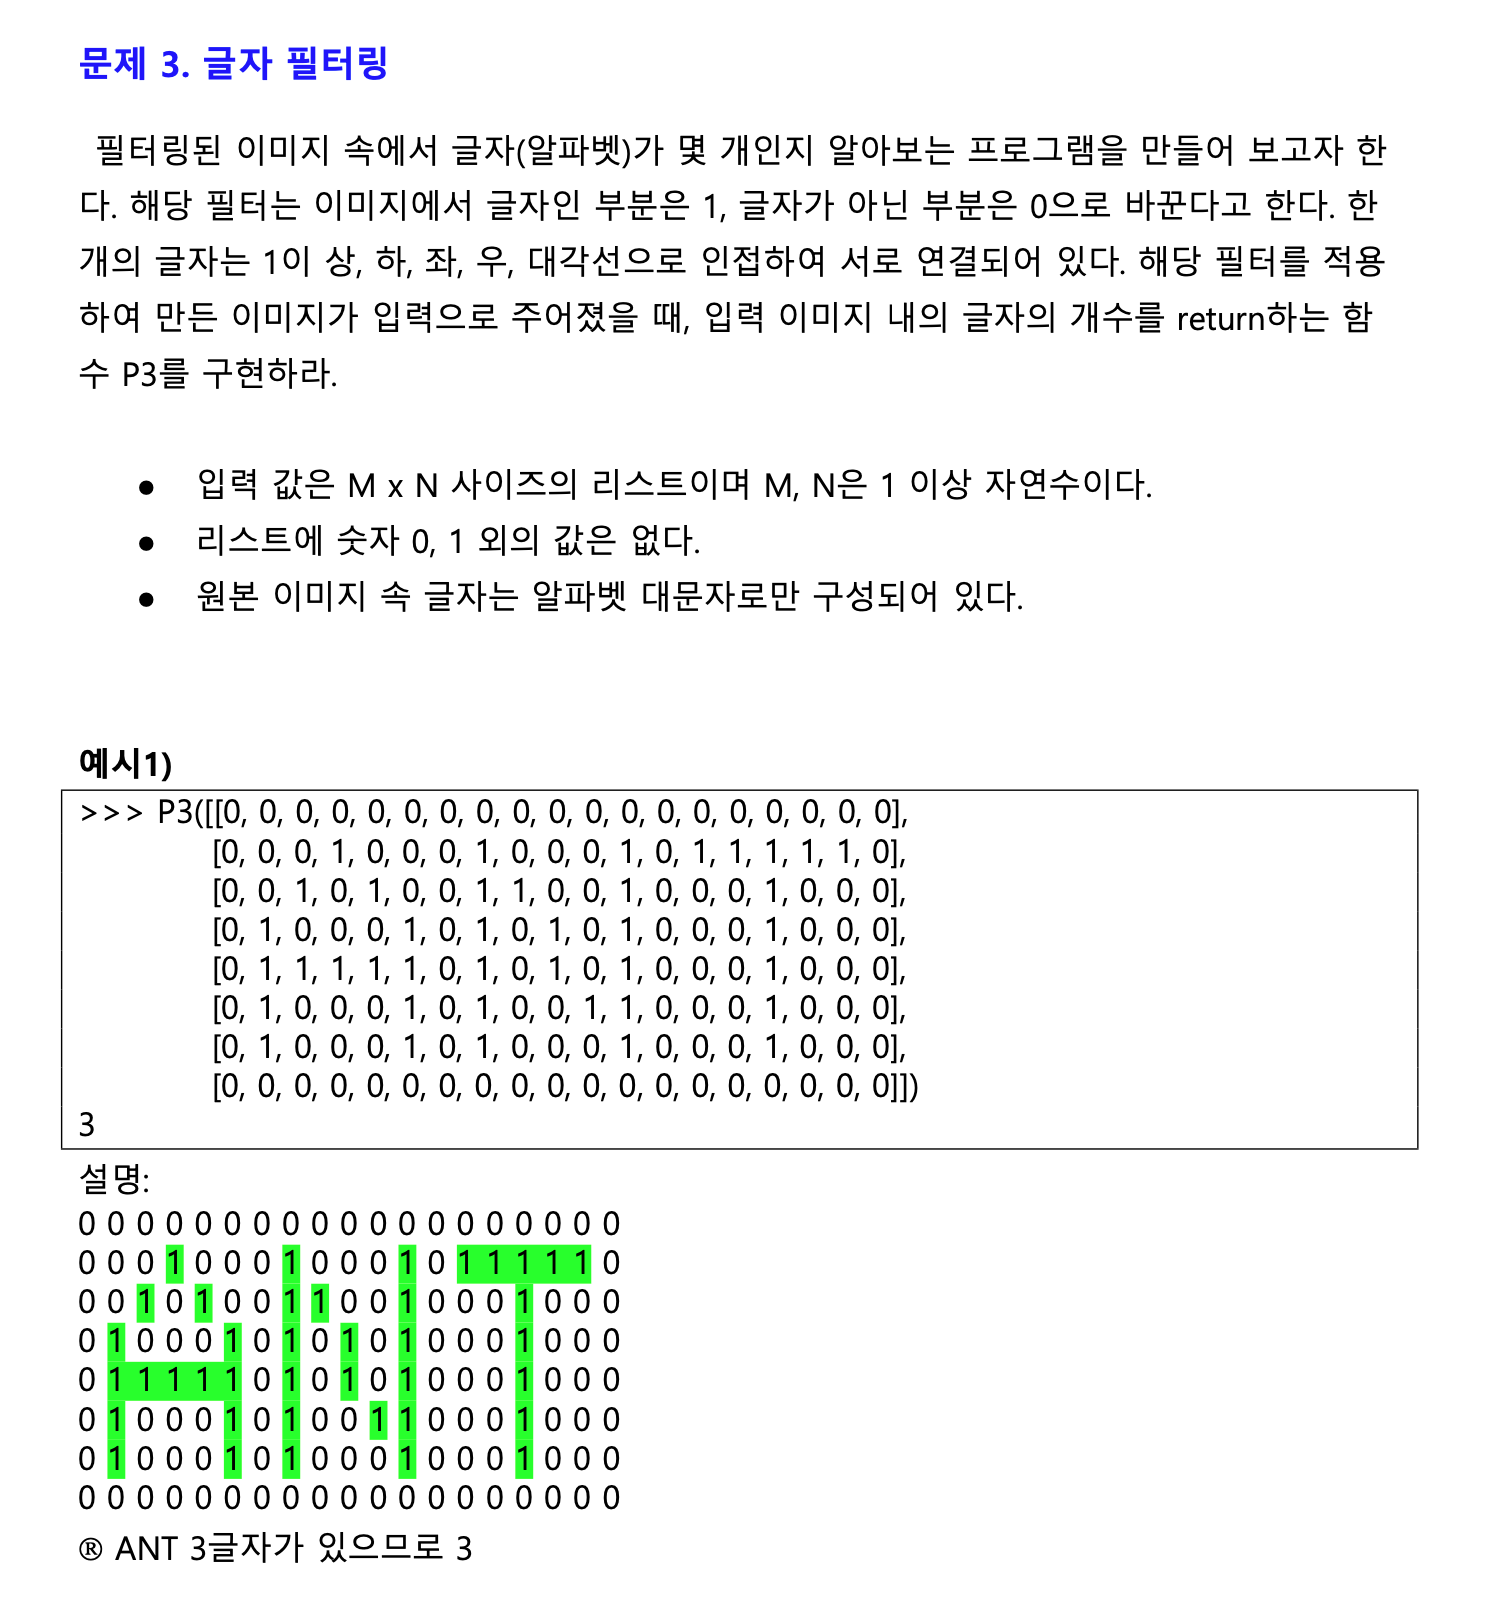
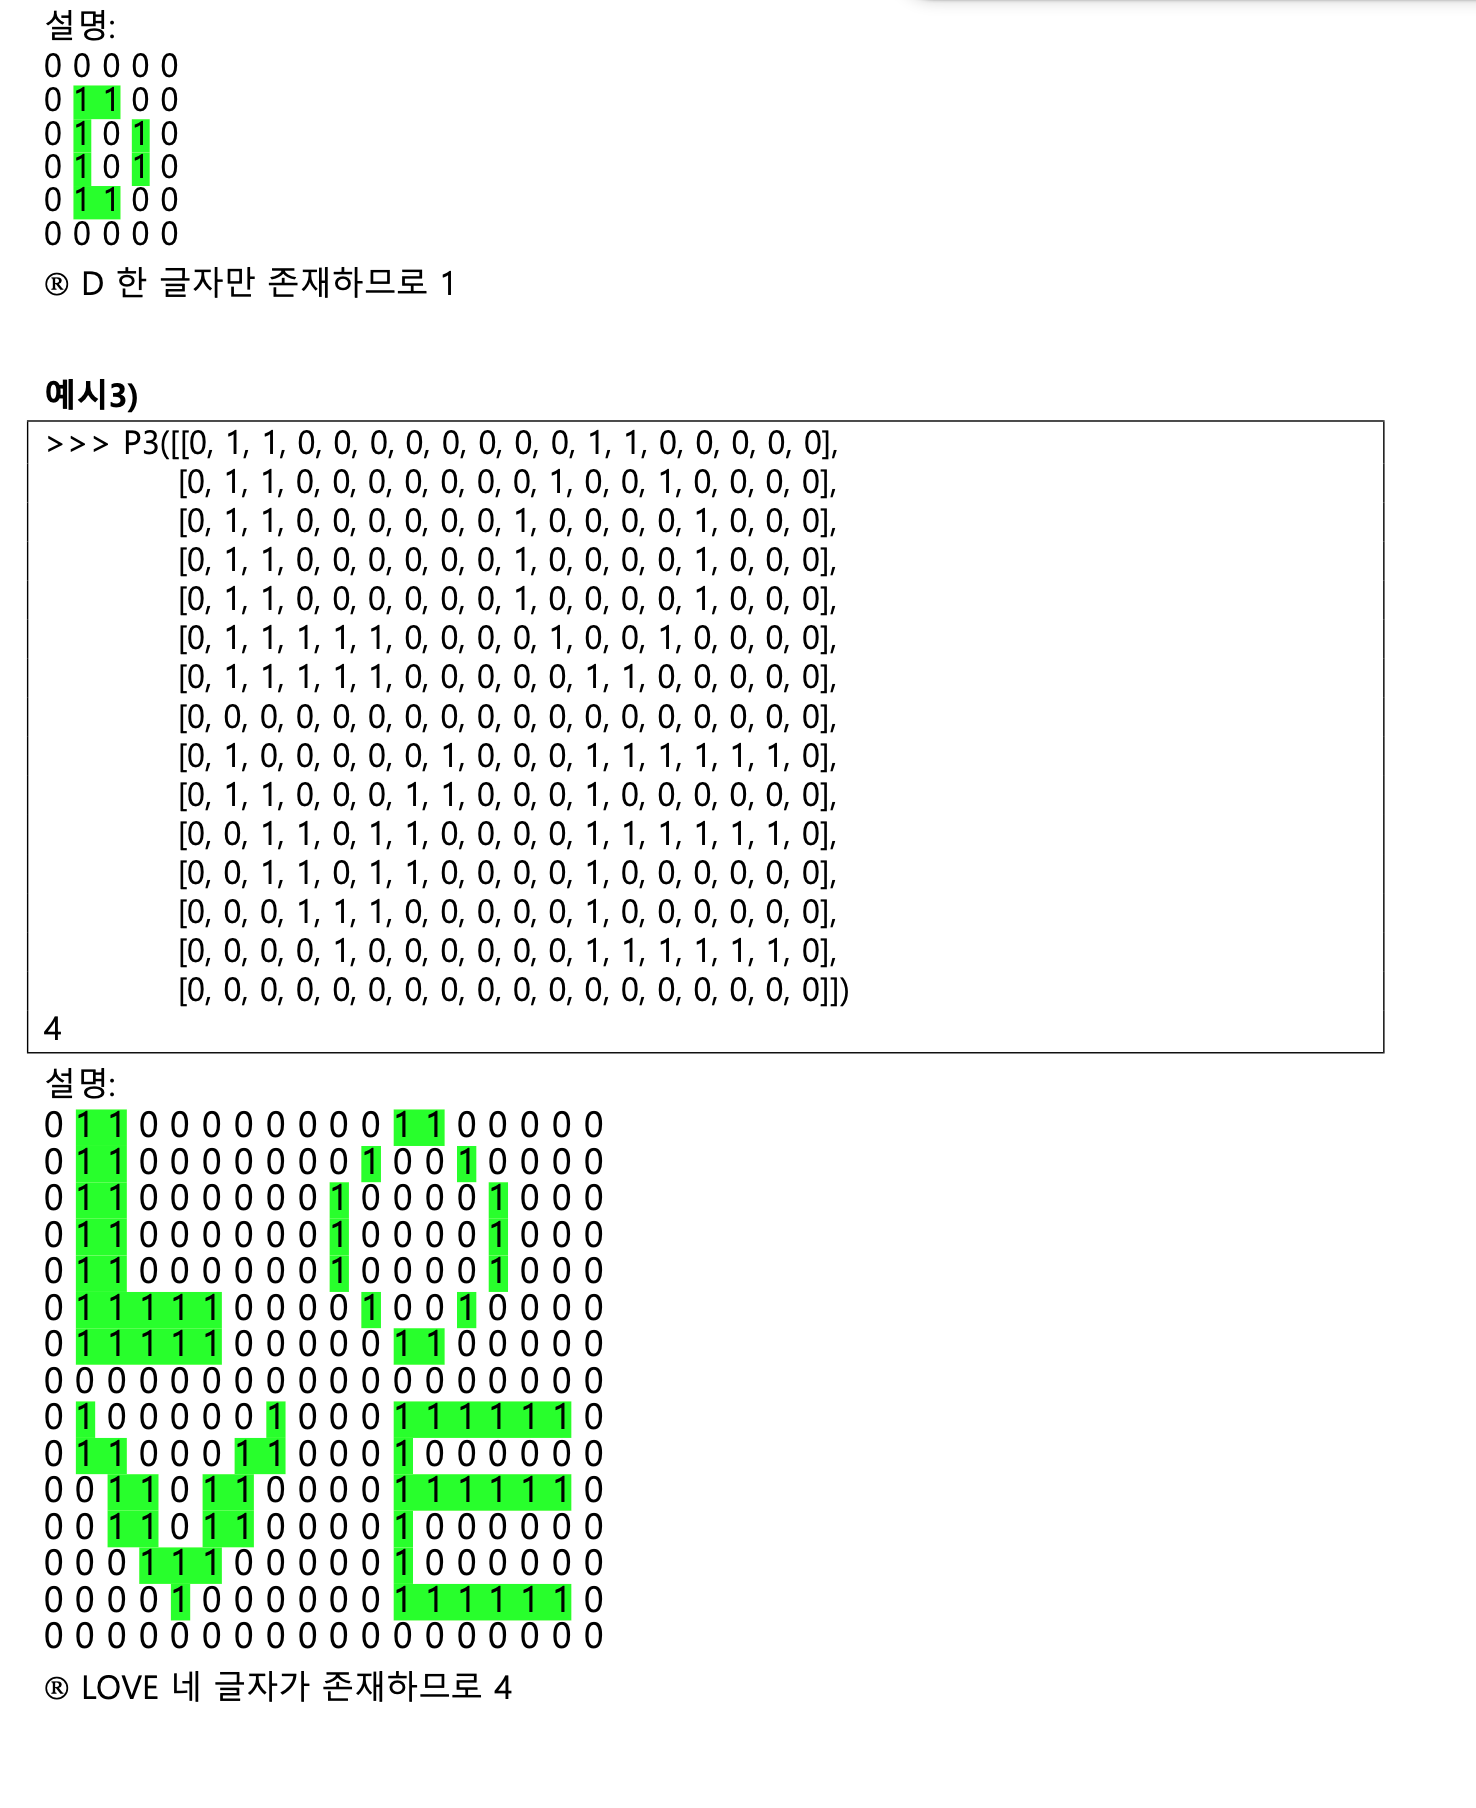

In [190]:
from typing import List
def P3(image: List[list]) -> int:
    ##### Write your Code Here #####

    def dfs(image, visit, m, n, i, j):
        if (0 <= i < m and 0 <= j < n and 
            image[i][j] == 1 and visit[i][j] == 0):
            visit[i][j] = 1
            dfs(image,visit,m,n, i+1, j)
            dfs(image,visit,m,n, i-1, j)
            dfs(image,visit,m,n, i, j+1)
            dfs(image,visit,m,n, i, j-1)
            dfs(image,visit,m,n, i+1, j+1)
            dfs(image,visit,m,n, i-1, j-1)
            dfs(image,visit,m,n, i+1, j-1)
            dfs(image,visit,m,n, i-1, j+1)
    
    m = len(image)
    n = len(image[0])
    letters = 0
    visit = [[0 for _ in range(n)] for _ in range(m)]
    
    for i in range(m):
        for j in range(n):
            if image[i][j] == 1 and visit[i][j] == 0:
                letters += 1
                dfs(image, visit, m, n, i, j)
    
    return letters
  
    ##### End of your code #####

In [191]:
P3([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0], [0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

3

In [192]:
P3([[0, 0, 0, 0, 0], [0, 1, 1, 0, 0], [0, 1, 0, 1, 0], [0, 1, 0, 1, 0], [0, 1, 1, 0, 0],
[0, 0, 0, 0, 0]])

1

In [193]:
P3([[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0], [0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

4

# P4
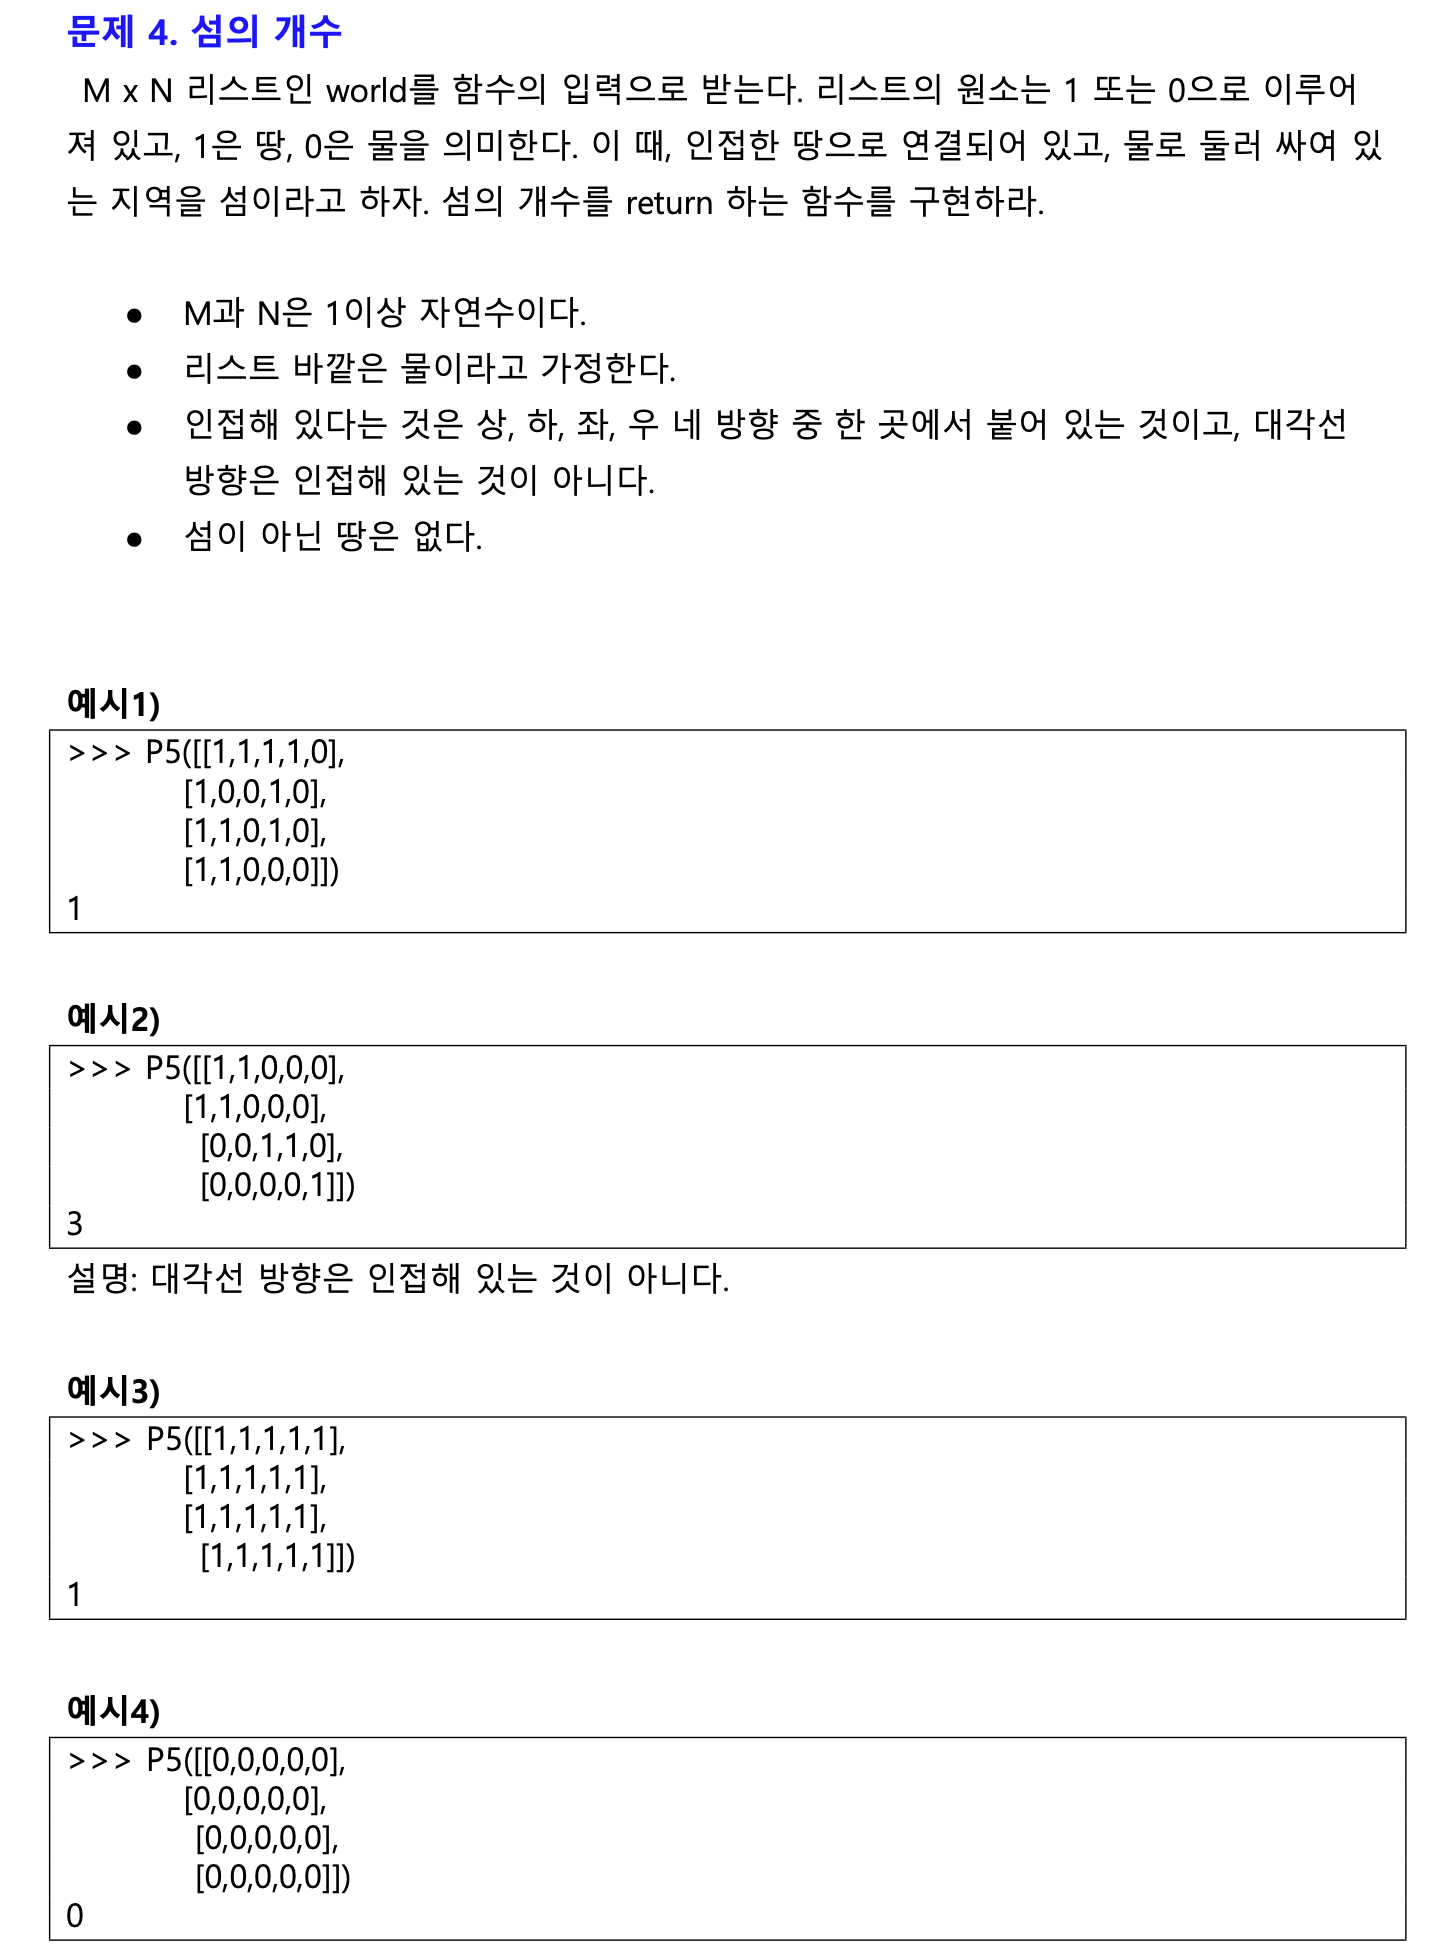
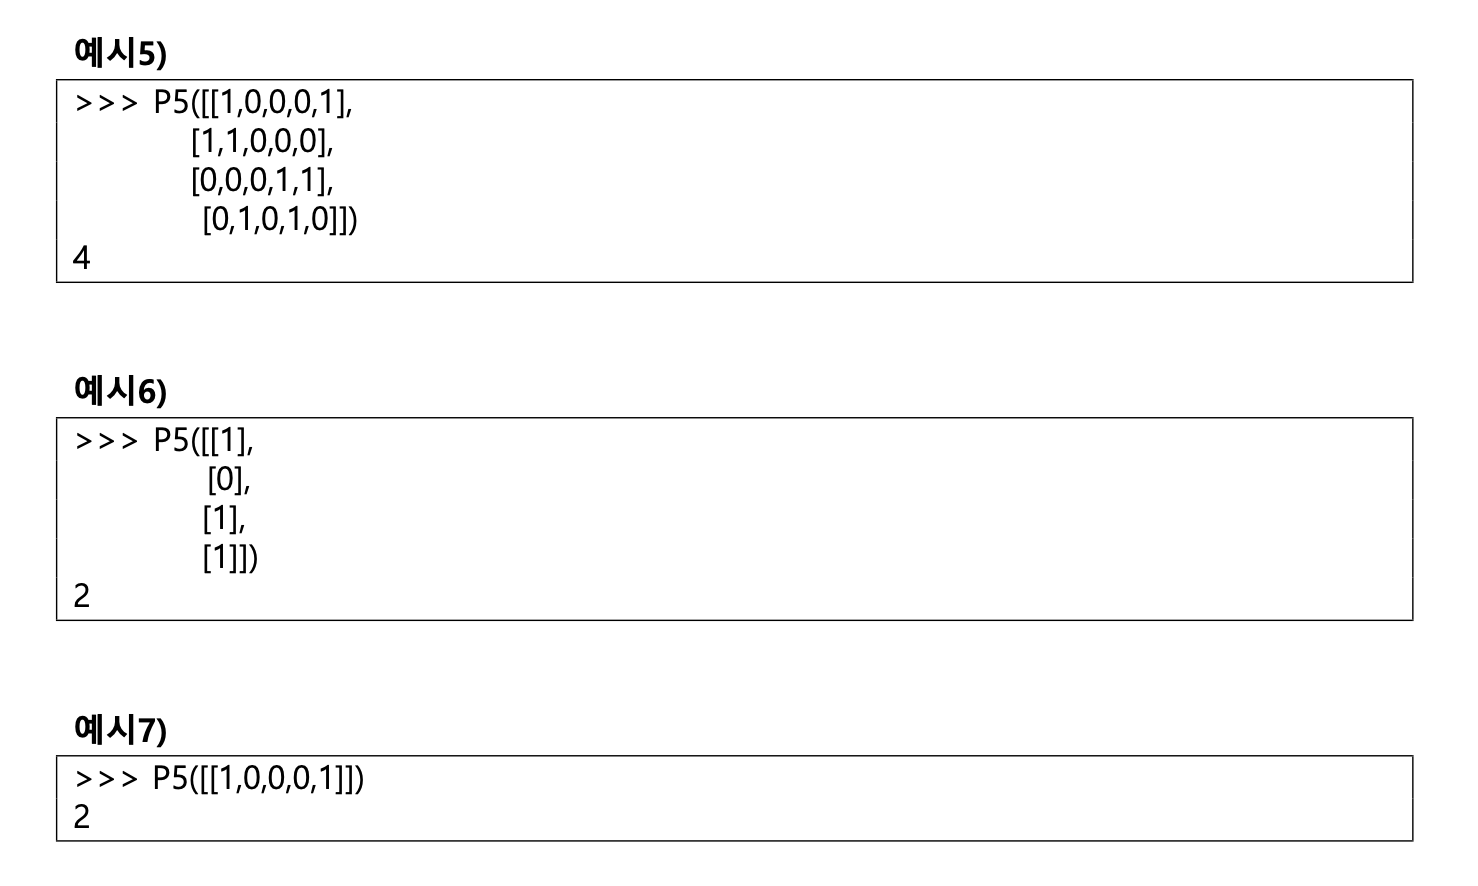

In [20]:
from typing import List
def P4(world: List[list]) -> int:
    ##### Write your Code Here #####
    
    def dfs(world, v, a, b, i, j):
        if (0 <= i < a and 0 <= j < b and 
            world[i][j] == 1 and v[i][j] == 0):
            v[i][j] = 1
            dfs(world,v,a, b, i+1, j)
            dfs(world,v,a, b, i-1, j)
            dfs(world,v,a, b, i, j+1)
            dfs(world,v,a, b, i, j-1)
    
    a = len(world)
    b = len(world[0])
    island = 0
    v = [[0 for _ in range(b)] for _ in range(a)]
    
    for i in range(a):
        for j in range(b):
            if world[i][j] == 1 and v[i][j] == 0:
                island += 1
                dfs(world, v, a, b, i, j)
    
    return island
  
    ##### End of your code #####

In [21]:
P4([[1,1,1,1,0], [1,0,0,1,0], [1,1,0,1,0],
[1,1,0,0,0]])

1

In [22]:
P4([[1,1,0,0,0], [1,1,0,0,0],
[0,0,1,1,0],
[0,0,0,0,1]])

3

In [23]:
P4([[1,1,1,1,1], [1,1,1,1,1], [1,1,1,1,1],
[1,1,1,1,1]])

1

In [24]:
P4([[0,0,0,0,0], [0,0,0,0,0],
[0,0,0,0,0],
[0,0,0,0,0]])

0

In [25]:
P4([[1,0,0,0,1], [1,1,0,0,0], [0,0,0,1,1],
[0,1,0,1,0]])

4

In [26]:
P4([[1], [0], [1],
[1]]) 

2

In [27]:
P4([[1,0,0,0,1]])

2